In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline
import datetime
from scipy.stats import norm

In [3]:
from yahoo_fin import options

In [4]:
from yahoo_fin import stock_info

In [22]:
S = stock_info.get_live_price("^GSPC")
S

3145.909912109375

In [71]:
sp500_calls = options.get_calls("^GSPC",'17/01/20')
sp500_calls = sp500_calls[sp500_calls['Open Interest']>100]
sp500_calls = sp500_calls[sp500_calls['Strike'].between(2900,4000)]
sp500_calls

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
40,SPX200117C02925000,2019-12-06 3:13PM EST,2925.0,234.90,0.00,0.0,0.00,-,1,11733,0.00%
41,SPX200117C02950000,2019-12-06 9:39AM EST,2950.0,207.52,0.00,0.0,0.00,-,2,10993,0.00%
42,SPX200117C02975000,2019-12-06 1:52PM EST,2975.0,191.50,0.00,0.0,0.00,-,2,18237,0.00%
43,SPX200117C03000000,2019-12-06 1:52PM EST,3000.0,169.30,0.00,0.0,0.00,-,13,47727,0.00%
44,SPX200117C03025000,2019-12-06 11:20AM EST,3025.0,146.75,141.90,143.8,0.00,-,36,17390,16.34%
45,SPX200117C03050000,2019-12-06 3:31PM EST,3050.0,125.71,121.80,122.5,0.00,-,14,21397,15.47%
46,SPX200117C03075000,2019-12-06 3:31PM EST,3075.0,105.31,0.00,0.0,0.00,-,24,24954,0.00%
48,SPX200117C03125000,2019-12-06 3:15PM EST,3125.0,67.00,63.90,64.6,0.00,-,1595,25928,12.92%
49,SPX200117C03150000,2019-12-06 4:59PM EST,3150.0,49.50,47.30,47.9,0.00,-,1975,37269,12.00%
50,SPX200117C03175000,2019-12-06 3:53PM EST,3175.0,34.40,32.80,33.3,0.00,-,1605,16495,11.11%


In [72]:
sp500_puts = options.get_puts("^GSPC",'17/01/20')
sp500_puts = sp500_puts[sp500_puts['Strike'].between(500,3200)]
sp500_puts = sp500_puts[sp500_puts['Open Interest']>1000]
sp500_puts

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,SPX200117P01000000,2019-12-04 1:24PM EST,1000.0,0.03,0.00,0.00,0.0,-,1,29369,50.00%
1,SPX200117P01100000,2019-10-14 9:00AM EST,1100.0,0.05,0.00,0.05,0.0,-,100,1950,89.06%
2,SPX200117P01200000,2019-10-15 9:05AM EST,1200.0,0.05,0.00,0.05,0.0,-,2,1335,82.03%
3,SPX200117P01250000,2019-09-12 2:55PM EST,1250.0,0.25,0.05,0.30,0.0,-,3200,8210,90.82%
5,SPX200117P01325000,2019-11-26 3:27PM EST,1325.0,0.05,0.00,0.00,0.0,-,25,3898,50.00%
7,SPX200117P01400000,2019-10-22 1:47PM EST,1400.0,0.10,0.00,0.10,0.0,-,30,2730,72.66%
8,SPX200117P01425000,2019-11-12 10:57AM EST,1425.0,0.05,0.00,0.00,0.0,-,130,4365,50.00%
9,SPX200117P01450000,2019-10-29 8:44AM EST,1450.0,0.08,0.00,0.10,0.0,-,724,7342,69.73%
11,SPX200117P01500000,2019-12-04 1:23PM EST,1500.0,0.03,0.00,0.00,0.0,-,1,31143,50.00%
13,SPX200117P01600000,2019-11-06 3:57PM EST,1600.0,0.10,0.00,0.10,0.0,-,2500,29847,61.13%


In [73]:
valid = '1234567890.' #valid characters for a float
def sanitize(data):
    return float(''.join(filter(lambda char: char in valid, data)))

In [74]:
sp500_puts['Implied Volatility'] = sp500_puts['Implied Volatility'].apply(sanitize)
sp500_calls['Implied Volatility'] = sp500_calls['Implied Volatility'].apply(sanitize)

In [75]:
sp500_puts['Implied Volatility'] = sp500_puts['Implied Volatility']/100
sp500_calls['Implied Volatility'] = sp500_calls['Implied Volatility']/100

In [76]:
sp500_puts

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,SPX200117P01000000,2019-12-04 1:24PM EST,1000.0,0.03,0.00,0.00,0.0,-,1,29369,0.5000
1,SPX200117P01100000,2019-10-14 9:00AM EST,1100.0,0.05,0.00,0.05,0.0,-,100,1950,0.8906
2,SPX200117P01200000,2019-10-15 9:05AM EST,1200.0,0.05,0.00,0.05,0.0,-,2,1335,0.8203
3,SPX200117P01250000,2019-09-12 2:55PM EST,1250.0,0.25,0.05,0.30,0.0,-,3200,8210,0.9082
5,SPX200117P01325000,2019-11-26 3:27PM EST,1325.0,0.05,0.00,0.00,0.0,-,25,3898,0.5000
7,SPX200117P01400000,2019-10-22 1:47PM EST,1400.0,0.10,0.00,0.10,0.0,-,30,2730,0.7266
8,SPX200117P01425000,2019-11-12 10:57AM EST,1425.0,0.05,0.00,0.00,0.0,-,130,4365,0.5000
9,SPX200117P01450000,2019-10-29 8:44AM EST,1450.0,0.08,0.00,0.10,0.0,-,724,7342,0.6973
11,SPX200117P01500000,2019-12-04 1:23PM EST,1500.0,0.03,0.00,0.00,0.0,-,1,31143,0.5000
13,SPX200117P01600000,2019-11-06 3:57PM EST,1600.0,0.10,0.00,0.10,0.0,-,2500,29847,0.6113


In [77]:
# S: underlying stock price 
# K: Option strike price 
# r: risk free rate # D: dividend value 
# vol: Volatility 
# T: time to expiry in years
def d1_calc(S, K, r, vol, T):
    # Calculates d1 in the BSM equation
    return (np.log(S/K) + (r + 0.5 * vol**2)*(T))/(vol*np.sqrt(T))

def BS_call(S, K, r, vol, T):
    d1 = d1_calc(S, K, r, vol, T)
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

def BS_put(S, K, r, vol, T):
    return BS_call(S, K, r, vol, T) - S + np.exp(-r*(T))*K

In [78]:
def implied_vol_put(P,S,K,r,vol,T):
    implied_vol = vol
    diff = P-BS_put(S,K,r,vol,T)
    while np.abs(diff)>0.01:
        implied_vol += 0.00001*np.sign(diff)
        diff = P - BS_put(S,K,r,implied_vol,T)
    return implied_vol

In [79]:
start = datetime.date.today()
end = datetime.date(2020,1,17)
days = np.busday_count(start,end)
days

29

In [80]:
T = days/252
r = 0.02
vol = 0.18

In [81]:
sp500_puts['AskVol'] = np.vectorize(implied_vol_put)(sp500_puts['Ask'],S,
                                                    sp500_puts['Strike'],r,
                                                    sp500_puts['Implied Volatility'],T)

In [82]:
sp500_puts

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,AskVol
0,SPX200117P01000000,2019-12-04 1:24PM EST,1000.0,0.03,0.00,0.00,0.0,-,1,29369,0.5000,0.50000
1,SPX200117P01100000,2019-10-14 9:00AM EST,1100.0,0.05,0.00,0.05,0.0,-,100,1950,0.8906,0.89980
2,SPX200117P01200000,2019-10-15 9:05AM EST,1200.0,0.05,0.00,0.05,0.0,-,2,1335,0.8203,0.82780
3,SPX200117P01250000,2019-09-12 2:55PM EST,1250.0,0.25,0.05,0.30,0.0,-,3200,8210,0.9082,0.92748
5,SPX200117P01325000,2019-11-26 3:27PM EST,1325.0,0.05,0.00,0.00,0.0,-,25,3898,0.5000,0.50000
7,SPX200117P01400000,2019-10-22 1:47PM EST,1400.0,0.10,0.00,0.10,0.0,-,30,2730,0.7266,0.74314
8,SPX200117P01425000,2019-11-12 10:57AM EST,1425.0,0.05,0.00,0.00,0.0,-,130,4365,0.5000,0.50000
9,SPX200117P01450000,2019-10-29 8:44AM EST,1450.0,0.08,0.00,0.10,0.0,-,724,7342,0.6973,0.71245
11,SPX200117P01500000,2019-12-04 1:23PM EST,1500.0,0.03,0.00,0.00,0.0,-,1,31143,0.5000,0.50000
13,SPX200117P01600000,2019-11-06 3:57PM EST,1600.0,0.10,0.00,0.10,0.0,-,2500,29847,0.6113,0.62628


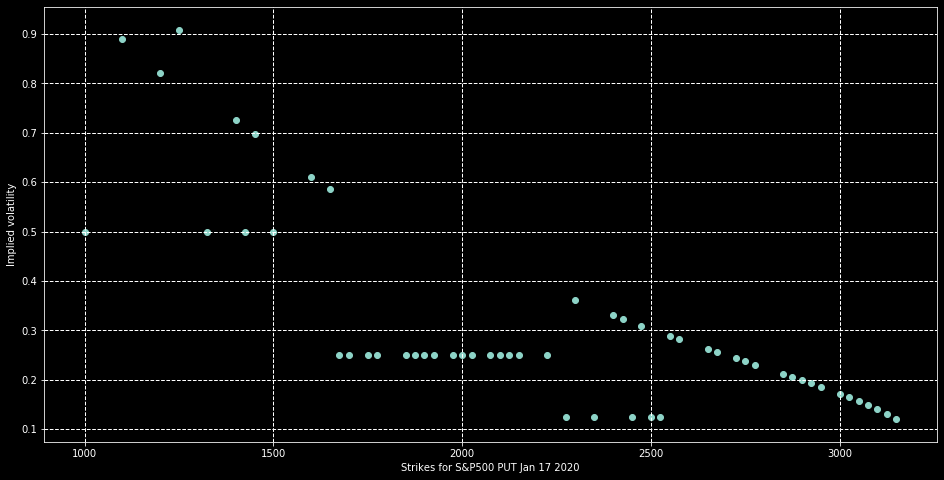

In [84]:
plt.figure(figsize=(16,8))
plt.scatter(sp500_puts['Strike'],sp500_puts['Implied Volatility'])
plt.grid(linestyle='--', linewidth=1)
plt.xlabel('Strikes for S&P500 PUT Jan 17 2020')
plt.ylabel('Implied volatility');

In [85]:
sp500_calls

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
40,SPX200117C02925000,2019-12-06 3:13PM EST,2925.0,234.90,0.00,0.0,0.00,-,1,11733,0.0000
41,SPX200117C02950000,2019-12-06 9:39AM EST,2950.0,207.52,0.00,0.0,0.00,-,2,10993,0.0000
42,SPX200117C02975000,2019-12-06 1:52PM EST,2975.0,191.50,0.00,0.0,0.00,-,2,18237,0.0000
43,SPX200117C03000000,2019-12-06 1:52PM EST,3000.0,169.30,0.00,0.0,0.00,-,13,47727,0.0000
44,SPX200117C03025000,2019-12-06 11:20AM EST,3025.0,146.75,141.90,143.8,0.00,-,36,17390,0.1634
45,SPX200117C03050000,2019-12-06 3:31PM EST,3050.0,125.71,121.80,122.5,0.00,-,14,21397,0.1547
46,SPX200117C03075000,2019-12-06 3:31PM EST,3075.0,105.31,0.00,0.0,0.00,-,24,24954,0.0000
48,SPX200117C03125000,2019-12-06 3:15PM EST,3125.0,67.00,63.90,64.6,0.00,-,1595,25928,0.1292
49,SPX200117C03150000,2019-12-06 4:59PM EST,3150.0,49.50,47.30,47.9,0.00,-,1975,37269,0.1200
50,SPX200117C03175000,2019-12-06 3:53PM EST,3175.0,34.40,32.80,33.3,0.00,-,1605,16495,0.1111


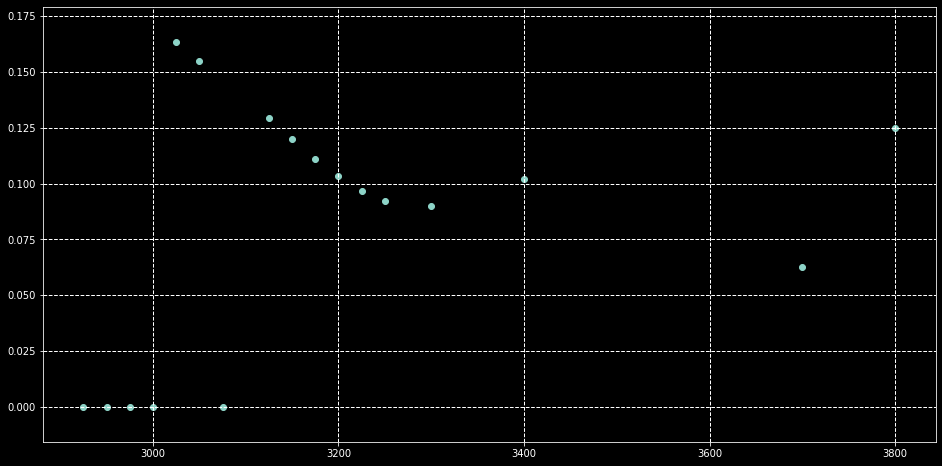

In [86]:
plt.figure(figsize=(16,8))
plt.grid(linestyle='--', linewidth=1)
plt.scatter(sp500_calls['Strike'],sp500_calls['Implied Volatility']);


In [89]:
def log_return(ticker,start,end):
    df = web.DataReader(ticker,'yahoo',start,end)
    df[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
    return df[ticker]

In [90]:
def portfolio_logr(tickers,start,end):
    portfolio = pd.concat([log_return(ticker,start,end)for ticker in tickers],axis=1)
    return portfolio

In [92]:
tickers = ['^GSPC']

In [93]:
start = datetime.datetime(1980,1,1)
end = datetime.datetime(2019,12,5)

In [94]:
returns = portfolio_logr(tickers,start,end)

In [96]:
returns.head(10)

,^GSPC
Date,
1980-01-02,NaN
1980-01-03,-0.005119
1980-01-04,0.012279
1980-01-07,0.002719
1980-01-08,0.019838
1980-01-09,0.000917
1980-01-10,0.007673
1980-01-11,0.000273
1980-01-14,0.004176


In [98]:
returns['Hist Vol'] = returns.rolling(252).std()*252**0.5
returns.head(5)

,^GSPC,Hist Vol
Date,,
1980-01-02,NaN,NaN
1980-01-03,-0.005119,NaN
1980-01-04,0.012279,NaN
1980-01-07,0.002719,NaN
1980-01-08,0.019838,NaN


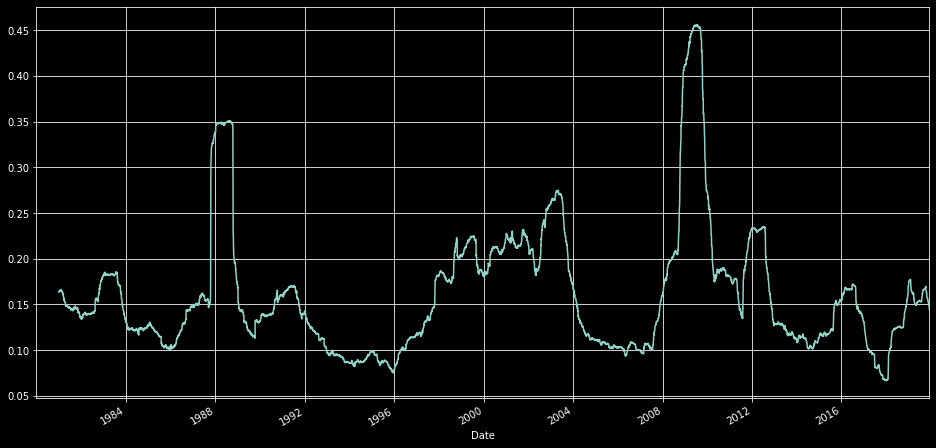

In [99]:
plt.style.use('dark_background')
returns['Hist Vol'].plot(figsize=(16,8),grid=True);